<a href="https://colab.research.google.com/github/neXT1me/AppTestStand/blob/main/pr_2_analis_data_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import datetime
import time
import json
import random
import sqlite3
import matplotlib.pyplot as plt

Практическая состоит из 3-х частей:
1) Изменение формата хранения данных из JSON в SQLite
2) Преобразование данных: инвертирование порядка адресов
3) Создание дат рождения по закону: хи-квадрат

In [ ]:
def generate_date(n):
    # Набор имен
    set_first_name = ["Nikita",
                      "Kristina",
                      "Oleg",
                      "Artem",
                      "Alexandra"]
    # Набор фамилий
    set_last_name = ["Sevastianov",
                     "Vorobiov",
                     "Nikolaeva",
                     'Mironova',
                     "Vinogradov"]
    # Набор городов и улиц
    city = ['Moscow', "Saratov", "Elista", "Saint Petersburg", "Volgograd"]
    street = ['Lomonosov', 'Lenin', 'Karbysheva', 'Chernevo', 'Glushko']
    # массив значений по хи-распределению для генерации дней рождения
    test_a = np.random.chisquare(4,1000)
    # Массив для готовых данных
    list_date = []
    # Генерация данных
    for i in range(n):
        # Из массива генерируем случайной выборкой 1 значение в именах, фамилиях,
        # водительские права (1 - есть права, 0-нет) и формируем список для адреса.
        first_name = random.choice(set_first_name)
        last_name = random.choice(set_last_name)

        # Даты по распределению генерируются путем умножения значения из массива значений по
        # хи-распределению и сгенерированных случайных дат (от начала unix времени до нынешнего)
        current_time = time.time()
        random_unixtime = int(random.randint(0, int(current_time)) * test_a[i])
        DoB = datetime.datetime.fromtimestamp(random_unixtime).isoformat()

        sex = random.choice(['M', 'F'])
        drivers_license = random.randint(0,1)

        # Адресс
        address = [random.choice(city),
                   random.choice(street),
                   random.randint(1, 200),
                   random.randint(1, 500)
                   ]
        # Добавляем созданные данные в массив
        list_date.append([first_name, last_name, DoB, sex, drivers_license, address])
        # Выводим данные результатом функции
    return list_date

# Функция по создаию гистограммы дней рождения
def stat_dob(list_dob):
    # отделяем показатели даты и времени и записываем в список только гг/мм/дд и преобразуем в формат date
    list_dob = [datetime.date.fromisoformat(i[:i.index('T')]) for i in list_dob]
    # Строим гистограмму
    plt.hist(list_dob,edgecolor='k', bins=30)
    plt.show()

In [ ]:
# 1. Генерируем данные
data = generate_date(1000)
data

[['Artem',
  'Mironova',
  '2334-12-13T14:01:05',
  'M',
  0,
  ['Volgograd', 'Chernevo', 198, 204]],
 ['Kristina',
  'Nikolaeva',
  '2073-01-14T19:36:19',
  'F',
  1,
  ['Volgograd', 'Chernevo', 68, 170]],
 ['Oleg',
  'Vinogradov',
  '2098-08-20T07:36:39',
  'M',
  1,
  ['Saratov', 'Lenin', 158, 415]],
 ['Oleg',
  'Mironova',
  '2003-09-16T04:51:27',
  'M',
  0,
  ['Elista', 'Chernevo', 113, 79]],
 ['Kristina',
  'Vinogradov',
  '2064-04-14T13:00:23',
  'M',
  1,
  ['Volgograd', 'Karbysheva', 122, 7]],
 ['Alexandra',
  'Sevastianov',
  '1973-02-26T13:14:20',
  'F',
  0,
  ['Volgograd', 'Lenin', 71, 398]],
 ['Kristina',
  'Mironova',
  '2213-10-15T16:37:22',
  'M',
  1,
  ['Elista', 'Glushko', 176, 244]],
 ['Oleg',
  'Mironova',
  '1971-09-07T10:33:11',
  'F',
  0,
  ['Saint Petersburg', 'Lenin', 144, 490]],
 ['Oleg',
  'Sevastianov',
  '2024-09-25T06:56:07',
  'M',
  0,
  ['Saratov', 'Lomonosov', 112, 109]],
 ['Alexandra',
  'Vorobiov',
  '2223-01-05T20:08:00',
  'M',
  0,
  ['Volgogr

In [ ]:
# 2. Сохранение даннных в 1 формате
with open('data_json.json', 'w') as file:
    json.dump(data, file)

In [ ]:
# 3. Считывание данных
with open('data_json.json', 'r') as file:
    data_load = json.loads(file.read())
data_load

[['Alexandra',
  'Sevastianov',
  '2119-09-19T02:48:47',
  'M',
  1,
  ['Elista', 'Karbysheva', 32, 249]],
 ['Kristina',
  'Nikolaeva',
  '2051-11-04T08:36:34',
  'M',
  0,
  ['Volgograd', 'Chernevo', 189, 419]],
 ['Oleg',
  'Sevastianov',
  '2070-03-09T08:22:15',
  'F',
  1,
  ['Saratov', 'Karbysheva', 93, 450]],
 ['Oleg',
  'Nikolaeva',
  '2434-05-28T04:31:37',
  'F',
  0,
  ['Moscow', 'Chernevo', 95, 338]],
 ['Kristina',
  'Sevastianov',
  '1970-05-19T07:43:40',
  'F',
  1,
  ['Elista', 'Karbysheva', 129, 476]],
 ['Oleg',
  'Nikolaeva',
  '1999-09-19T16:40:22',
  'M',
  0,
  ['Volgograd', 'Lomonosov', 121, 238]],
 ['Alexandra',
  'Mironova',
  '2016-04-09T09:48:43',
  'F',
  1,
  ['Moscow', 'Chernevo', 41, 367]],
 ['Nikita',
  'Mironova',
  '2031-05-08T07:13:13',
  'M',
  1,
  ['Volgograd', 'Glushko', 116, 147]],
 ['Artem',
  'Sevastianov',
  '1982-11-15T02:03:49',
  'F',
  0,
  ['Moscow', 'Glushko', 58, 259]],
 ['Artem',
  'Vorobiov',
  '1989-07-24T06:05:33',
  'M',
  1,
  ['Saint 

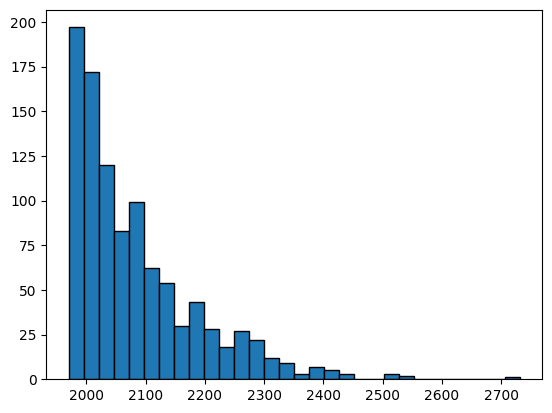

In [ ]:
# 4. Построение гистограммы на основе ДР
data_DoB = [i[2] for i in data_load]
stat_dob(data_DoB)

In [ ]:
print('-----До обработки данных------')
for i in range(2):
  print(data_load[i])
print('-')
for i in range(2):
  print(data_load[998+i])


# 5. Инвертирование порядка адресов
for i in range(int(len(data_load)/2)):
    data_load[i][5], data_load[999-i][5] = data_load[999-i][5], data_load[i][5]

print('-----После обработки данных------')
for i in range(2):
  print(data_load[i])
print('-')
for i in range(2):
  print(data_load[998+i])


-----До обработки данных------
['Artem', 'Sevastianov', '1996-04-19T17:49:18', 'F', 0, ['Saratov', 'Karbysheva', 84, 293]]
['Artem', 'Vorobiov', '2010-03-04T14:23:29', 'F', 0, ['Saratov', 'Karbysheva', 21, 265]]
-
['Oleg', 'Vorobiov', '2026-11-26T11:17:15', 'M', 1, ['Saratov', 'Glushko', 55, 350]]
['Alexandra', 'Vorobiov', '2031-01-11T19:44:11', 'F', 1, ['Moscow', 'Chernevo', 185, 143]]
-----После обработки данных------
['Artem', 'Sevastianov', '1996-04-19T17:49:18', 'F', 0, ['Moscow', 'Chernevo', 185, 143]]
['Artem', 'Vorobiov', '2010-03-04T14:23:29', 'F', 0, ['Saratov', 'Glushko', 55, 350]]
-
['Oleg', 'Vorobiov', '2026-11-26T11:17:15', 'M', 1, ['Saratov', 'Karbysheva', 21, 265]]
['Alexandra', 'Vorobiov', '2031-01-11T19:44:11', 'F', 1, ['Saratov', 'Karbysheva', 84, 293]]


In [ ]:
# 6. сохранение в другом формате

# Создаем множество с существующими адресами предварительно
# Преобразуя все списки в кортежи
adr_set = set([tuple(data_load[i][5]) for i in range(len(data_load))])
# Присваиваем к каждому уникальному адресу соответствующий id и создаем словарь
address = {adr:i for i, adr in enumerate(adr_set)}


conn = sqlite3.connect('people.db')
conn.cursor()

# Создание таблицы с людьми
conn.execute('''CREATE TABLE people (
FIRST_NAME TEXT NOT NULL,
LAST_NAME TEXT NOT NULL,
DAY_OF_BIRTHDAY TEXT NOT NULL,
Sex TEXT NOT NULL,
DRIVERS_LICENSE INTEGER,
ADDRESS INTTEGER
);''')

# Создание таблицы с адресами людей
conn.execute('''CREATE TABLE address (
ID INTEGER PRIMARY KEY,
CITY TEXT,
STREET TEXT,
HOME INTEGER,
FLAT INTEGER
);''')

# Заполняем таблицу с людьми
for i in range(len(data_load)):
  param = tuple(data_load[i][:-1] + [address[tuple(data_load[i][-1])]])
  conn.execute('''INSERT INTO people VALUES (?,?,?,?,?,?)''', param)

# Заполняем таблицу с адресами
for adr, id in address.items():
  param_adr = (id, ) + adr
  conn.execute('''INSERT INTO address VALUES (?,?,?,?,?)''', param_adr)


conn.commit()
conn.close()

NameError: name 'data_load' is not defined

In [ ]:
test = address.values()
test

443

In [ ]:
# 7. считывание данных из файла sql
conn = sqlite3.connect('people.db')
conn.cursor()
data_sql = list(conn.execute('''SELECT *
FROM people
JOIN address on people.ADDRESS=address.ID'''))
for i in data_sql:
  print(i)

('Artem', 'Sevastianov', '1996-04-19T17:49:18', 'F', 0, 498, 498, 'Moscow', 'Chernevo', 185, 143)
('Artem', 'Vorobiov', '2010-03-04T14:23:29', 'F', 0, 869, 869, 'Saratov', 'Glushko', 55, 350)
('Oleg', 'Nikolaeva', '1987-10-04T07:51:50', 'F', 1, 616, 616, 'Saint Petersburg', 'Lomonosov', 9, 107)
('Kristina', 'Nikolaeva', '2020-07-02T07:22:03', 'M', 1, 563, 563, 'Moscow', 'Lomonosov', 38, 280)
('Artem', 'Nikolaeva', '2024-07-07T16:08:29', 'M', 0, 315, 315, 'Saint Petersburg', 'Glushko', 30, 226)
('Kristina', 'Nikolaeva', '1982-08-10T19:22:45', 'M', 0, 651, 651, 'Saratov', 'Lenin', 83, 282)
('Kristina', 'Nikolaeva', '2030-09-18T10:46:05', 'M', 1, 976, 976, 'Moscow', 'Chernevo', 134, 365)
('Artem', 'Vinogradov', '1979-03-23T17:20:14', 'M', 0, 516, 516, 'Elista', 'Glushko', 134, 434)
('Alexandra', 'Vorobiov', '1989-04-27T22:47:16', 'F', 0, 459, 459, 'Moscow', 'Karbysheva', 10, 18)
('Kristina', 'Nikolaeva', '2011-08-20T23:53:46', 'M', 1, 723, 723, 'Saint Petersburg', 'Lomonosov', 61, 386)
('

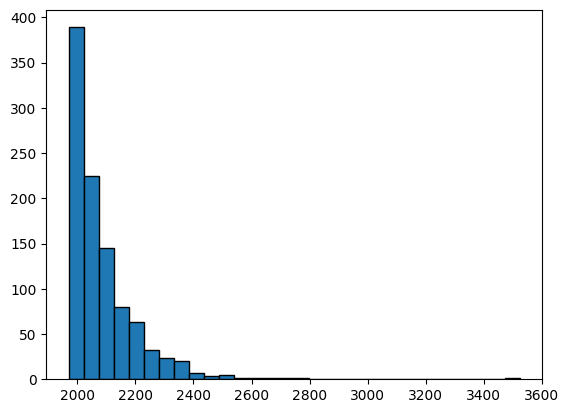

In [ ]:
# 8. Построение диаграммы по данным из базы sql
stat_dob([i[2] for i in data_sql])